In [1]:
# %matplotlib
from astropy.coordinates import solar_system_ephemeris,get_body_barycentric, get_body, get_moon, EarthLocation
from astropy.time import Time
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

t = Time("2012-09-22 23:22")
loc = EarthLocation.of_site('greenwich')

loc.geodetic

GeodeticLocation(lon=<Longitude -0.001475 deg>, lat=<Latitude 51.477811 deg>, height=<Quantity 46. m>)

In [2]:
def planetDistance(src,time):
    ret = {}
    for p in solar_system_ephemeris.bodies:
        if p == 'earth' or p == 'earth-moon-barycenter': continue
        z=get_body(p,time,src)
        distance = z.distance.value
        if z.distance.unit == 'km':
            distance = z.distance.value/149597871
        ret[p]=distance
    return ret

d=planetDistance(loc,t)

print(d)

{'sun': 1.003454767943082, 'moon': 0.0024960719932460114, 'mercury': 1.387084553579754, 'venus': 0.9992212271716482, 'mars': 1.9075594641956688, 'jupiter': 4.692428632372687, 'saturn': 10.638697587207371, 'uranus': 19.064532003123524, 'neptune': 29.116050562843387}


In [3]:
datelist = pd.date_range(start='1/1/2000', periods=365*21).tolist()
tmp = {}
#for d in datelist: 
#    tmp[d]=planetDistance(loc,Time(d))

#data = pd.DataFrame.from_dict(tmp, orient='index')
#data.to_csv('planet_dst_20.csv')

In [30]:
DATA_URL = 'planet_dst_20.csv'
df = pd.read_csv(DATA_URL)
#df = df[df.date.between('2000-01-01', '2016-12-30')]
df.head(5)

,date,sun,moon,mercury,venus,mars,jupiter,saturn,uranus,neptune
0,2000-01-01,0.983369,0.002697,1.413129,1.134365,1.846969,4.613556,8.644531,20.722939,31.021062
1,2000-01-02,0.983362,0.002722,1.417747,1.140849,1.852392,4.629080,8.658915,20.732818,31.027767
2,2000-01-03,0.983359,0.002739,1.421818,1.147305,1.857817,4.644673,8.673450,20.742459,31.034201
3,2000-01-04,0.983360,0.002748,1.425346,1.153733,1.863245,4.660329,8.688129,20.751859,31.040360
4,2000-01-05,0.983365,0.002751,1.428330,1.160132,1.868674,4.676043,8.702947,20.761014,31.046244


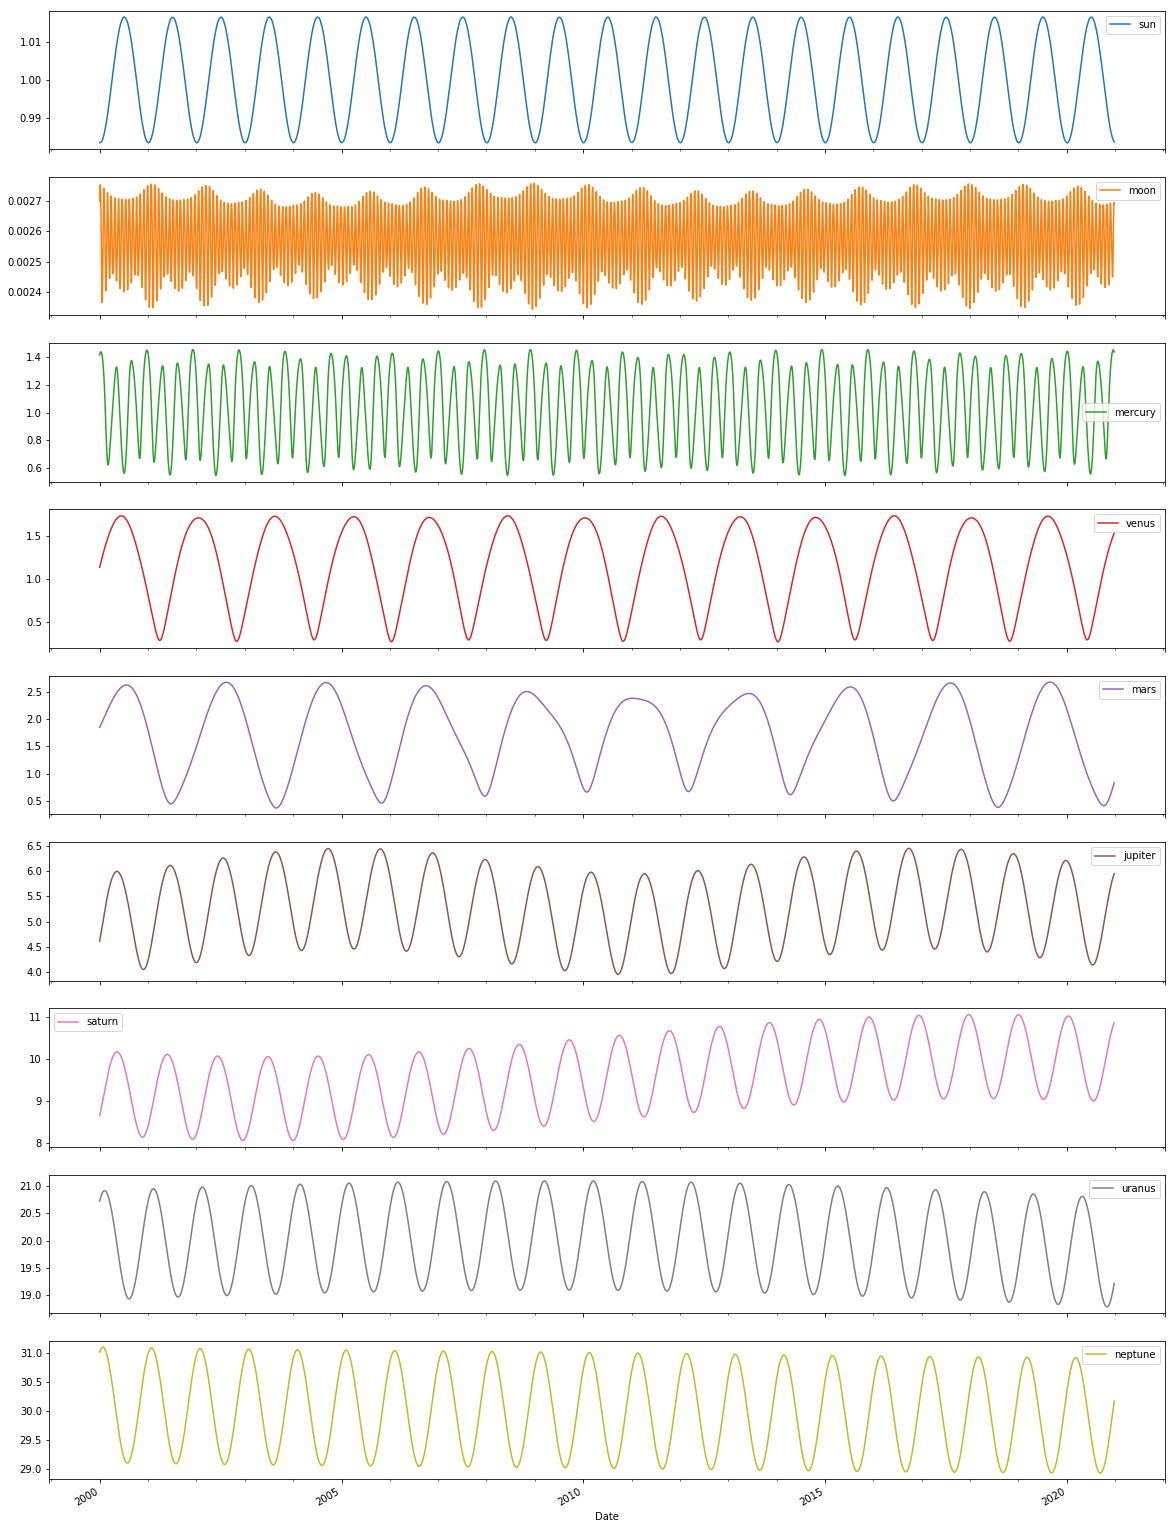

In [92]:
df['Date'] = pd.to_datetime(df['date'])
ax = df.set_index('Date').plot(subplots=True,rot=45,figsize=(20,30))
plt.gcf().autofmt_xdate()
plt.show()

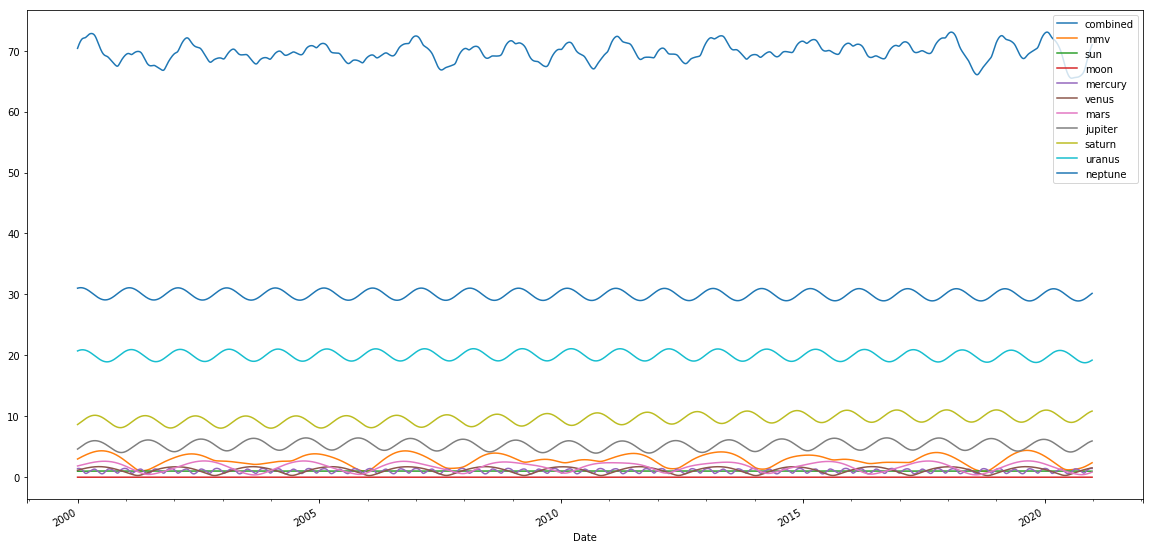

In [81]:
ret = {}
for index, row in df.iterrows():
    ret[row['date']]=({
        'date': row['date'],
        'combined': row['sun']+row['moon']+row['mercury']+row['venus']+row['mars']+row['jupiter']+row['saturn']+row['uranus']+row['neptune'],
        'mmv': row['moon']+row['venus']+row['mars'],
        'sun':row['sun'],
        'moon':row['moon'],
        'mercury':row['mercury'],
        'venus':row['venus'],
        'mars':row['mars'],
        'jupiter':row['jupiter'],
        'saturn':row['saturn'],
        'uranus':row['uranus'],
        'neptune':row['neptune'],
    })
data = pd.DataFrame.from_dict(ret, orient='index')
data['Date'] = pd.to_datetime(data['date'])
az = data.set_index('Date').plot(rot=45,figsize=(20,10))
#az.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gcf().autofmt_xdate()
plt.show()


In [34]:
from astropy import units as u
u.g.find_equivalent_units()


planetsM = {
            'moon': 7.34*10**22,
            'mercury': 3.30*10**23,
            'mars': 6.42*10**23,
            'venus': 4.87*10**24,
            'earth': 5.97*10**24,
            'uranus': 8.68*10**25,
            'neptune': 1.02*10**26,
            'saturn': 5.68*10**26,
            'jupiter': 1.90*10**27,
            'sun': 1.98*10**30,
           }

planetsM

{'moon': 7.34e+22,
 'mercury': 3.2999999999999996e+23,
 'mars': 6.419999999999999e+23,
 'venus': 4.87e+24,
 'earth': 5.969999999999999e+24,
 'uranus': 8.68e+25,
 'neptune': 1.02e+26,
 'saturn': 5.68e+26,
 'jupiter': 1.8999999999999998e+27,
 'sun': 1.98e+30}

In [84]:
plt_gr={}
def gravity(planet,time):
    m1=planetsM['earth']
    m2=planetsM[planet]
    d=ret[time]
    r=d[planet]*(149597871*1000)
    G=6.673*(10**-11)
    f=(G*m1*m2)/(r**2)
    return f
for index, row in data.iterrows():
    plt_gr[row['date']]={
        'date': row['date'],
        'sun': gravity('sun',row['date']),
        'moon': gravity('moon',row['date']),
        'mercury': gravity('mercury',row['date']),
        'venus': gravity('venus',row['date']),
        'mars': gravity('mars',row['date']),
        'jupiter': gravity('jupiter',row['date']),
        'saturn': gravity('saturn',row['date']),
        'uranus': gravity('uranus',row['date']),
        'neptune': gravity('neptune',row['date']),
    }

In [87]:
DATA_GRT_URL = 'planet_grt_20.csv'

data_grt = pd.DataFrame.from_dict(plt_gr, orient='index')
data_grt.head(5)
#data_grt.to_csv('planet_grt_20.csv')

dz = pd.read_csv(DATA_GRT_URL)
dz.head(5)

,Unnamed: 0,date,sun,moon,mercury,venus,mars,jupiter,saturn,uranus,neptune
0,2000-01-01,2000-01-01,3.644823e+22,1.795858e+20,2.941676e+15,6.737025e+16,3.350120e+15,1.589010e+18,1.353038e+17,3.598004e+15,1.886824e+15
1,2000-01-02,2000-01-02,3.644878e+22,1.763624e+20,2.922546e+15,6.660660e+16,3.330534e+15,1.578370e+18,1.348547e+17,3.594576e+15,1.886009e+15
2,2000-01-03,2000-01-03,3.644901e+22,1.741977e+20,2.905831e+15,6.585910e+16,3.311110e+15,1.567790e+18,1.344031e+17,3.591235e+15,1.885227e+15
3,2000-01-04,2000-01-04,3.644893e+22,1.729860e+20,2.891465e+15,6.512732e+16,3.291848e+15,1.557274e+18,1.339493e+17,3.587983e+15,1.884479e+15
4,2000-01-05,2000-01-05,3.644854e+22,1.726222e+20,2.879394e+15,6.441084e+16,3.272748e+15,1.546825e+18,1.334936e+17,3.584819e+15,1.883765e+15


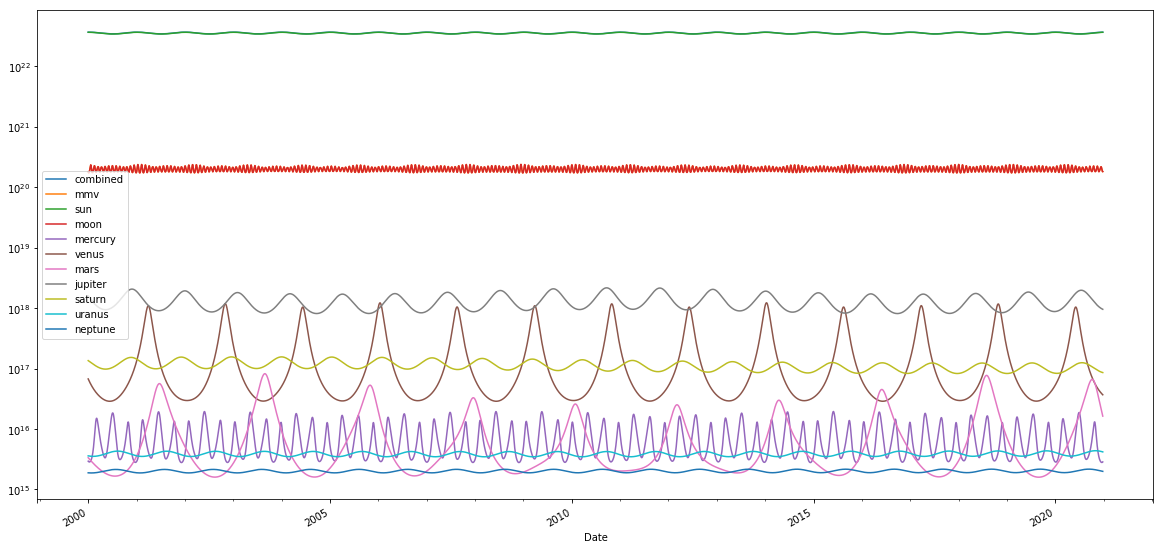

In [91]:
#PLOT GRAVITY
ret = {}
for index, row in dz.iterrows():
    ret[index]=({
        'date': row['date'],
        'combined': row['sun']+row['moon']+row['mercury']+row['venus']+row['mars']+row['jupiter']+row['saturn']+row['uranus']+row['neptune'],
        'mmv': row['moon']+row['venus']+row['mars'],
        'sun':row['sun'],
        'moon':row['moon'],
        'mercury':row['mercury'],
        'venus':row['venus'],
        'mars':row['mars'],
        'jupiter':row['jupiter'],
        'saturn':row['saturn'],
        'uranus':row['uranus'],
        'neptune':row['neptune'],
    })
data = pd.DataFrame.from_dict(ret, orient='index')
data['Date'] = pd.to_datetime(data['date'])
az = data.set_index('Date').plot(rot=45,figsize=(20,10))
#az.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.yscale('symlog')
plt.gcf().autofmt_xdate()
plt.show()
